# DATA MINING - WEEK 7
## NGUYEN XUAN VIET DUC - 22280012
### Lesson 7: GROUP ANALYSIS (CON)

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [2]:
path_to_file = 'data.csv'

customer_data = pd.read_csv(path_to_file)
customer_data.shape
customer_data.columns
print(customer_data.describe().transpose())
print(customer_data.head())

                        count    mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.50  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.85  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.56  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.20  25.823522   1.0  34.75   50.0   73.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0  
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
intervals = [15, 20, 30 ,40 ,50, 60 ,70]
col = customer_data['Age']
customer_data['Age Groups'] = pd.cut(x=col, bins = intervals)
print(customer_data['Age Groups'])

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Age Groups, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]


In [4]:
print(customer_data.groupby('Age Groups')['Age Groups'].count())

Age Groups
(15, 20]    17
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Age Groups, dtype: int64


/tmp/ipykernel_6131/3147721040.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(customer_data.groupby('Age Groups')['Age Groups'].count())


In [5]:
customer_data_oh = pd.get_dummies(customer_data, dtype = 'int')
print(customer_data_oh)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1   19                  15                      39   
1             2   21                  15                      81   
2             3   20                  16                       6   
3             4   23                  16                      77   
4             5   31                  17                      40   
..          ...  ...                 ...                     ...   
195         196   35                 120                      79   
196         197   45                 126                      28   
197         198   32                 126                      74   
198         199   32                 137                      18   
199         200   30                 137                      83   

     Genre_Female  Genre_Male  Age Groups_(15, 20]  Age Groups_(20, 30]  \
0               0           1                    1                    0   
1               0           1    

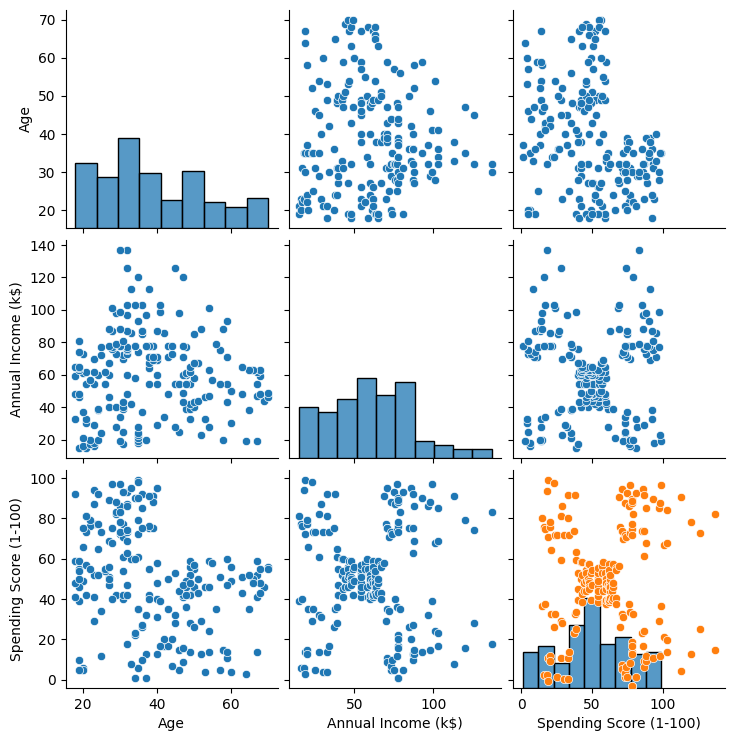

In [6]:
customer_data = customer_data.drop('CustomerID', axis = 1)
sns.pairplot(customer_data)
sns.scatterplot(x=customer_data['Annual Income (k$)'],
                y=customer_data['Spending Score (1-100)'])
plt.show()

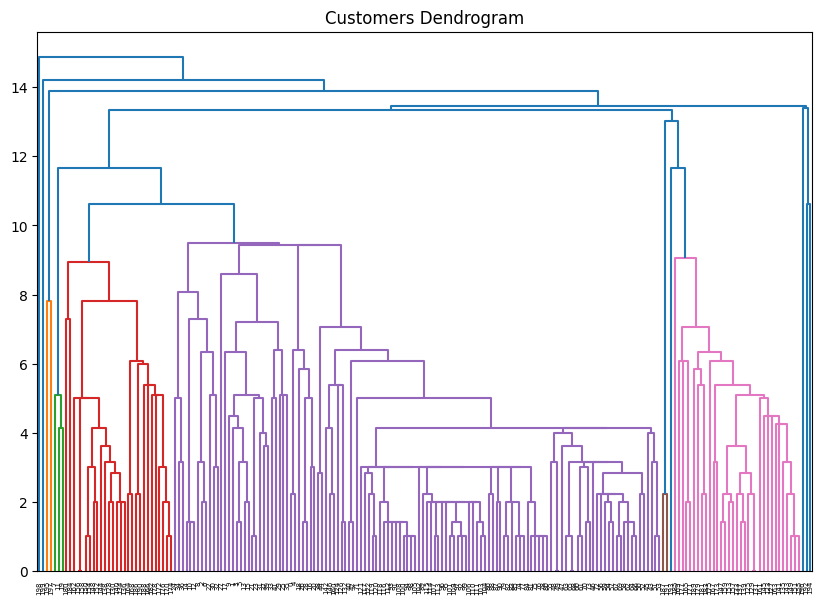

In [7]:
customer_data_for_single = customer_data.copy()
customer_data_for_single = customer_data_for_single.drop(['Age'], axis=1)
customer_data_for_single.shape # (200, 10)

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Score by index
selected_data_single = customer_data_for_single.iloc[:, 1:3]
clusters_single = shc.linkage(selected_data_single,
                        method='single',
                        metric='euclidean')
shc.dendrogram(Z=clusters_single)
plt.show()

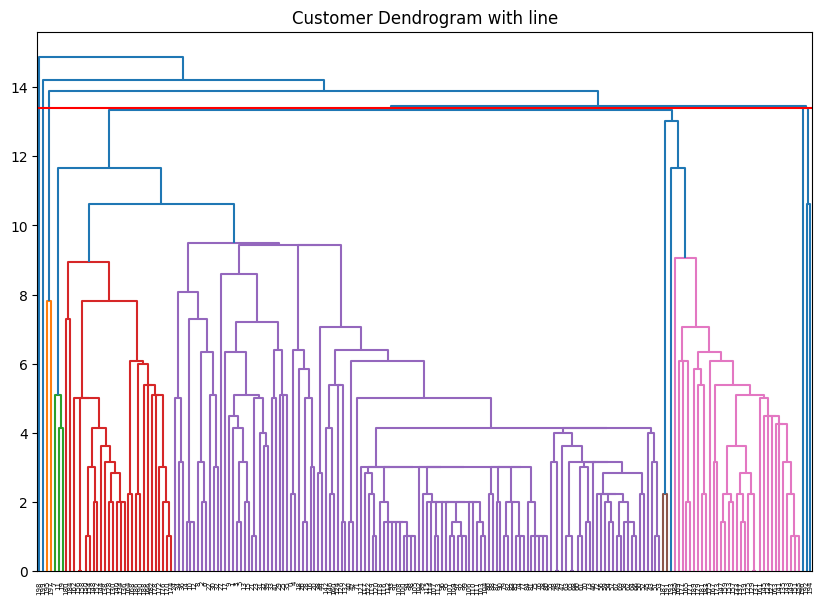

In [8]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrogram with line")
clusters_single = shc.linkage(selected_data_single,
                       method='single',
                       metric='euclidean')
shc.dendrogram(clusters_single)
plt.axhline(y = 13.4, color = 'r', linestyle = '-')
plt.show()  

In [9]:
clustering_model_single = AgglomerativeClustering(n_clusters=5,
                                           # affinity = 'euclidean',
                                           linkage = 'single')
clusters = clustering_model_single.fit_predict(selected_data_single)
clustering_model_single.labels_

data_labels_single = clustering_model_single.labels_
print(data_labels_single)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 4 0 4 3 2]


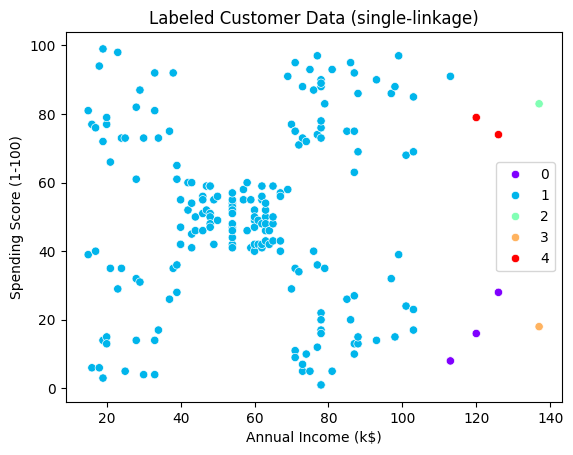

In [10]:
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                data=selected_data_single,
                hue=data_labels_single,
                palette="rainbow").set_title('Labeled Customer Data (single-linkage)')
plt.show()

## Implementation code from scratch

In [12]:
def euclidean_dist_manual(point1, point2):
    """Computes Euclidean distance between two points."""
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [13]:
def get_cluster_points_from_data(original_data, point_indices_in_cluster):
    """
    Retrieves the actual data points belonging to a cluster.
    original_data: NxD numpy array of the full dataset.
    point_indices_in_cluster: A set or list of row indices from original_data.
    """
    if not point_indices_in_cluster:
        return np.array([])
    return original_data[list(point_indices_in_cluster), :]

In [14]:
def single_linkage_dist_scratch(cluster1_actual_points, cluster2_actual_points):
    """Computes single linkage (min) distance between two clusters."""
    min_d = float('inf')
    if cluster1_actual_points.ndim == 1: cluster1_actual_points = cluster1_actual_points.reshape(1, -1)
    if cluster2_actual_points.ndim == 1: cluster2_actual_points = cluster2_actual_points.reshape(1, -1)
    
    if cluster1_actual_points.shape[0] == 0 or cluster2_actual_points.shape[0] == 0:
        return float('inf') # Should not happen with proper cluster management

    for p1 in cluster1_actual_points:
        for p2 in cluster2_actual_points:
            d = euclidean_dist_manual(p1, p2)
            if d < min_d:
                min_d = d
    return min_d


In [15]:
def complete_linkage_dist_scratch(cluster1_actual_points, cluster2_actual_points):
    """Computes complete linkage (max) distance between two clusters."""
    max_d = 0.0
    if cluster1_actual_points.ndim == 1: cluster1_actual_points = cluster1_actual_points.reshape(1, -1)
    if cluster2_actual_points.ndim == 1: cluster2_actual_points = cluster2_actual_points.reshape(1, -1)

    if cluster1_actual_points.shape[0] == 0 or cluster2_actual_points.shape[0] == 0:
        return 0.0 

    for p1 in cluster1_actual_points:
        for p2 in cluster2_actual_points:
            d = euclidean_dist_manual(p1, p2)
            if d > max_d:
                max_d = d
    return max_d

In [16]:
def average_linkage_dist_scratch(cluster1_actual_points, cluster2_actual_points):
    """Computes average linkage (UPGMA) distance between two clusters."""
    total_d = 0.0
    count = 0
    if cluster1_actual_points.ndim == 1: cluster1_actual_points = cluster1_actual_points.reshape(1, -1)
    if cluster2_actual_points.ndim == 1: cluster2_actual_points = cluster2_actual_points.reshape(1, -1)
    
    n1 = cluster1_actual_points.shape[0]
    n2 = cluster2_actual_points.shape[0]

    if n1 == 0 or n2 == 0:
        return float('inf')

    for p1 in cluster1_actual_points:
        for p2 in cluster2_actual_points:
            total_d += euclidean_dist_manual(p1, p2)
            count += 1
    
    return total_d / count if count > 0 else 0.0


In [17]:
class AgglomerativeClusteringScratch:
    def __init__(self, n_clusters=None, linkage='single'):
        self.n_clusters_to_find = n_clusters
        self.linkage_method = linkage
        self.linkage_matrix_ = None # To store the Z matrix (merges)
        self.labels_ = None       # To store final cluster assignments
        self._data = None          # Original data
        self._n_samples = 0

    def _calculate_inter_cluster_distance(self, cluster_i_points_data, cluster_j_points_data):
        if self.linkage_method == 'single':
            return single_linkage_dist_scratch(cluster_i_points_data, cluster_j_points_data)
        elif self.linkage_method == 'complete':
            return complete_linkage_dist_scratch(cluster_i_points_data, cluster_j_points_data)
        elif self.linkage_method == 'average':
            return average_linkage_dist_scratch(cluster_i_points_data, cluster_j_points_data)
        else:
            raise ValueError(f"Unsupported linkage method: {self.linkage_method}")

    def fit(self, X):
        self._data = np.asarray(X)
        self._n_samples = self._data.shape[0]
        if self._n_samples == 0:
            self.linkage_matrix_ = np.array([])
            self.labels_ = np.array([])
            return self
        if self._n_samples == 1:
            self.linkage_matrix_ = np.array([]) # No merges for a single point
            if self.n_clusters_to_find ==1:
                 self.labels_ = np.array([0])
            else: # Or handle as an error/specific case
                 self.labels_ = np.array([0]) # Or np.array([])
            return self

        # Initialize: each point is a cluster.
        # `current_clusters` stores a list of sets; each set contains original point indices.
        current_clusters_point_indices = [{i} for i in range(self._n_samples)]
        
        # `cluster_ids_for_linkage` stores the ID for each cluster active in `current_clusters_point_indices`.
        # Original points are 0 to n-1. New (merged) clusters get IDs n, n+1, ...
        cluster_ids_for_linkage = list(range(self._n_samples))
        next_new_cluster_id = self._n_samples

        self.linkage_matrix_ = np.zeros((self._n_samples - 1, 4))

        for k_merge_step in range(self._n_samples - 1): # n-1 merges needed
            min_dist_found = float('inf')
            merge_pair_indices_in_list = (-1, -1) # Indices in `current_clusters_point_indices` list

            num_active_clusters = len(current_clusters_point_indices)
            
            # Find the closest pair of current clusters
            for i in range(num_active_clusters):
                for j in range(i + 1, num_active_clusters):
                    # Get actual data points for cluster i and cluster j
                    cluster_i_original_indices = current_clusters_point_indices[i]
                    cluster_j_original_indices = current_clusters_point_indices[j]
                    
                    points_for_cluster_i = get_cluster_points_from_data(self._data, cluster_i_original_indices)
                    points_for_cluster_j = get_cluster_points_from_data(self._data, cluster_j_original_indices)
                    
                    d = self._calculate_inter_cluster_distance(points_for_cluster_i, points_for_cluster_j)
                    
                    if d < min_dist_found:
                        min_dist_found = d
                        merge_pair_indices_in_list = (i, j)
                    elif d == min_dist_found: # Tie-breaking: pick smallest indices first
                        # This simple tie-breaking might differ from scipy, affecting linkage matrix slightly
                        current_i_id = cluster_ids_for_linkage[i]
                        current_j_id = cluster_ids_for_linkage[j]
                        prev_i_id = cluster_ids_for_linkage[merge_pair_indices_in_list[0]]
                        prev_j_id = cluster_ids_for_linkage[merge_pair_indices_in_list[1]]
                        if min(current_i_id, current_j_id) < min(prev_i_id, prev_j_id):
                             merge_pair_indices_in_list = (i, j)
                        elif min(current_i_id, current_j_id) == min(prev_i_id, prev_j_id) and \
                             max(current_i_id, current_j_id) < max(prev_i_id, prev_j_id):
                             merge_pair_indices_in_list = (i, j)


            idx1_in_list, idx2_in_list = merge_pair_indices_in_list
            
            # Get the linkage IDs of the clusters being merged
            linkage_id1 = cluster_ids_for_linkage[idx1_in_list]
            linkage_id2 = cluster_ids_for_linkage[idx2_in_list]

            # Content of the clusters being merged
            set_points1 = current_clusters_point_indices[idx1_in_list]
            set_points2 = current_clusters_point_indices[idx2_in_list]

            # Create new merged cluster
            newly_merged_cluster_content = set_points1.union(set_points2)
            num_points_in_new_cluster = len(newly_merged_cluster_content)

            # Record merge in linkage matrix (format: [id1, id2, distance, num_points])
            # Ensure id1 < id2 for consistency with scipy (though scipy sorts internally)
            self.linkage_matrix_[k_merge_step, 0] = min(linkage_id1, linkage_id2)
            self.linkage_matrix_[k_merge_step, 1] = max(linkage_id1, linkage_id2)
            self.linkage_matrix_[k_merge_step, 2] = min_dist_found
            self.linkage_matrix_[k_merge_step, 3] = num_points_in_new_cluster
            
            # Update `current_clusters_point_indices` and `cluster_ids_for_linkage`
            # Remove the two old clusters (larger index first to maintain list integrity)
            # Add the new merged cluster and its new ID
            
            # Pop from lists based on original indices idx1_in_list, idx2_in_list
            # Important: pop the element with the larger index first
            if idx1_in_list > idx2_in_list:
                current_clusters_point_indices.pop(idx1_in_list)
                current_clusters_point_indices.pop(idx2_in_list)
                cluster_ids_for_linkage.pop(idx1_in_list)
                cluster_ids_for_linkage.pop(idx2_in_list)
            else:
                current_clusters_point_indices.pop(idx2_in_list)
                current_clusters_point_indices.pop(idx1_in_list)
                cluster_ids_for_linkage.pop(idx2_in_list)
                cluster_ids_for_linkage.pop(idx1_in_list)

            current_clusters_point_indices.append(newly_merged_cluster_content)
            cluster_ids_for_linkage.append(next_new_cluster_id)
            
            next_new_cluster_id += 1

        # If n_clusters_to_find is specified, derive labels using scipy's fcluster on our matrix
        if self.n_clusters_to_find is not None and self.linkage_matrix_ is not None and self.linkage_matrix_.shape[0] > 0:
            try:
                self.labels_ = shc.fcluster(self.linkage_matrix_, t=self.n_clusters_to_find, criterion='maxclust')
                # fcluster returns 1-indexed labels, convert to 0-indexed
                if self.labels_ is not None and self.labels_.min() == 1:
                    self.labels_ -= 1
            except Exception as e:
                print(f"Note: Could not derive labels using shc.fcluster for scratch model: {e}")
                self.labels_ = np.array([0] * self._n_samples) # Fallback or error
        elif self.n_clusters_to_find is not None and self._n_samples > 0 : # Handle case of 1 sample or n_clusters = n_samples
             if self.n_clusters_to_find == self._n_samples:
                 self.labels_ = np.arange(self._n_samples)
             elif self.n_clusters_to_find == 1:
                 self.labels_ = np.zeros(self._n_samples, dtype=int)


        return self

    def fit_predict(self, X):
        self.fit(X)
        return self.labels_

Successfully loaded data from 'data.csv'. Using columns: 'Annual Income (k$)' and 'Spending Score (1-100)'.
Data shape: (200, 2)

--- Testing Linkage Method: SINGLE ---

1. From Scratch Implementation:
Linkage Matrix (Scratch) Z_scratch (first 5 rows if large):
     id1    id2  distance  num_points
0   48.0   49.0       0.0         2.0
1   65.0   68.0       0.0         2.0
2  129.0  131.0       0.0         2.0
3  156.0  158.0       0.0         2.0
4   21.0   23.0       1.0         2.0
Cluster Labels (Scratch) (first 20): [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of unique labels (Scratch): 5

2. Scipy Implementation (for Linkage Matrix):
Linkage Matrix (Scipy) Z_scipy (first 5 rows if large):
     id1    id2  distance  num_points
0   48.0   49.0       0.0         2.0
1   65.0   68.0       0.0         2.0
2  156.0  158.0       0.0         2.0
3  129.0  131.0       0.0         2.0
4   67.0   69.0       1.0         2.0
Max absolute difference in distances between Z_scratch and Z_sc

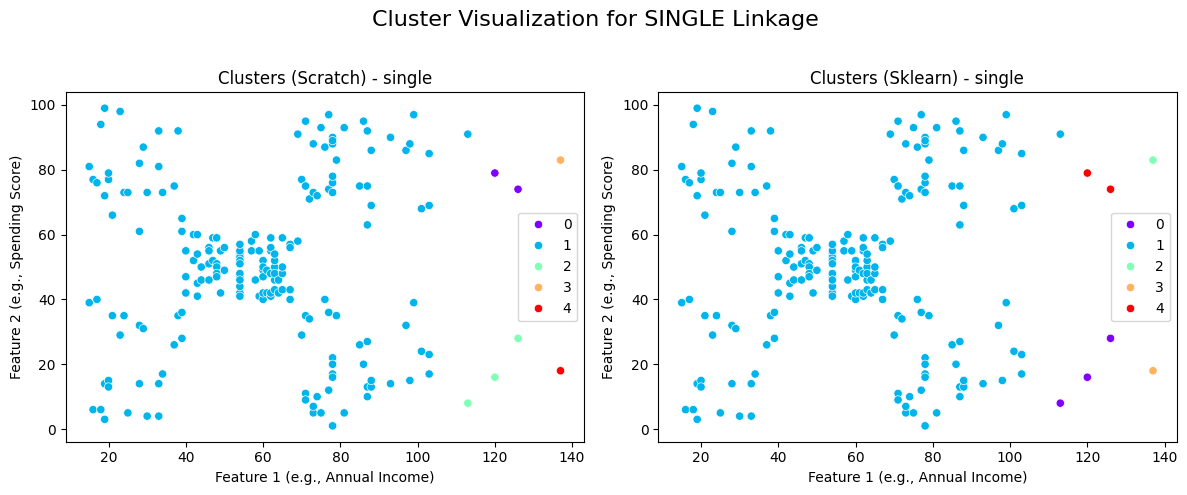


--- Testing Linkage Method: COMPLETE ---

1. From Scratch Implementation:
Linkage Matrix (Scratch) Z_scratch (first 5 rows if large):
     id1    id2  distance  num_points
0   48.0   49.0       0.0         2.0
1   65.0   68.0       0.0         2.0
2  129.0  131.0       0.0         2.0
3  156.0  158.0       0.0         2.0
4   21.0   23.0       1.0         2.0
Cluster Labels (Scratch) (first 20): [2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]
Number of unique labels (Scratch): 5

2. Scipy Implementation (for Linkage Matrix):
Linkage Matrix (Scipy) Z_scipy (first 5 rows if large):
     id1    id2  distance  num_points
0   65.0   68.0       0.0         2.0
1   48.0   49.0       0.0         2.0
2  129.0  131.0       0.0         2.0
3  156.0  158.0       0.0         2.0
4   21.0   23.0       1.0         2.0
Max absolute difference in distances between Z_scratch and Z_scipy: 4.3820
Mean absolute difference in distances: 0.1869
Distances in linkage matrices have some differences (expected due to 

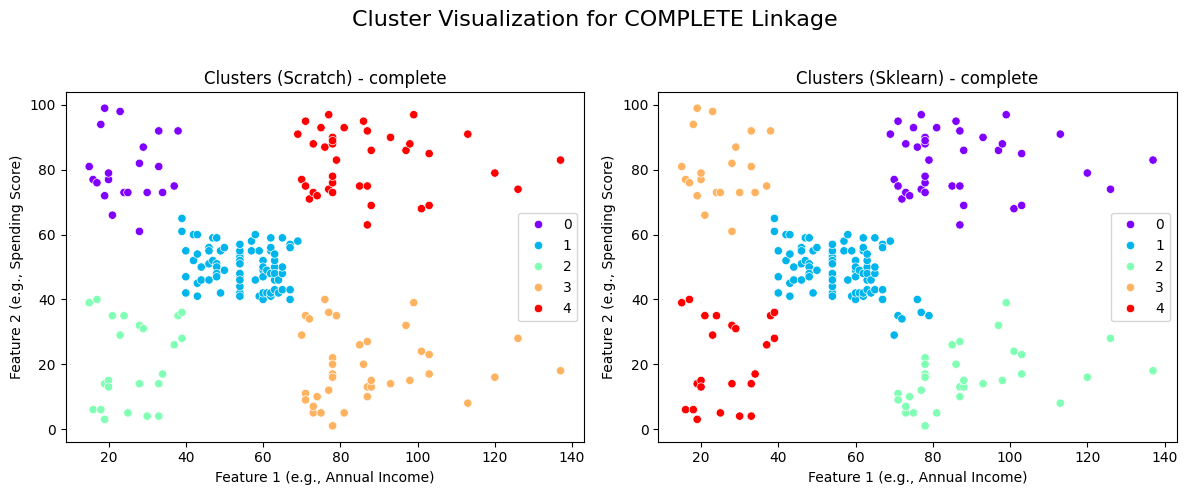


--- Testing Linkage Method: AVERAGE ---

1. From Scratch Implementation:
Linkage Matrix (Scratch) Z_scratch (first 5 rows if large):
     id1    id2  distance  num_points
0   48.0   49.0       0.0         2.0
1   65.0   68.0       0.0         2.0
2  129.0  131.0       0.0         2.0
3  156.0  158.0       0.0         2.0
4   21.0   23.0       1.0         2.0
Cluster Labels (Scratch) (first 20): [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3]
Number of unique labels (Scratch): 5

2. Scipy Implementation (for Linkage Matrix):
Linkage Matrix (Scipy) Z_scipy (first 5 rows if large):
     id1    id2  distance  num_points
0   65.0   68.0       0.0         2.0
1   48.0   49.0       0.0         2.0
2  156.0  158.0       0.0         2.0
3  129.0  131.0       0.0         2.0
4   21.0   23.0       1.0         2.0
Max absolute difference in distances between Z_scratch and Z_scipy: 0.4842
Mean absolute difference in distances: 0.0215
Distances in linkage matrices have some differences (expected due to p

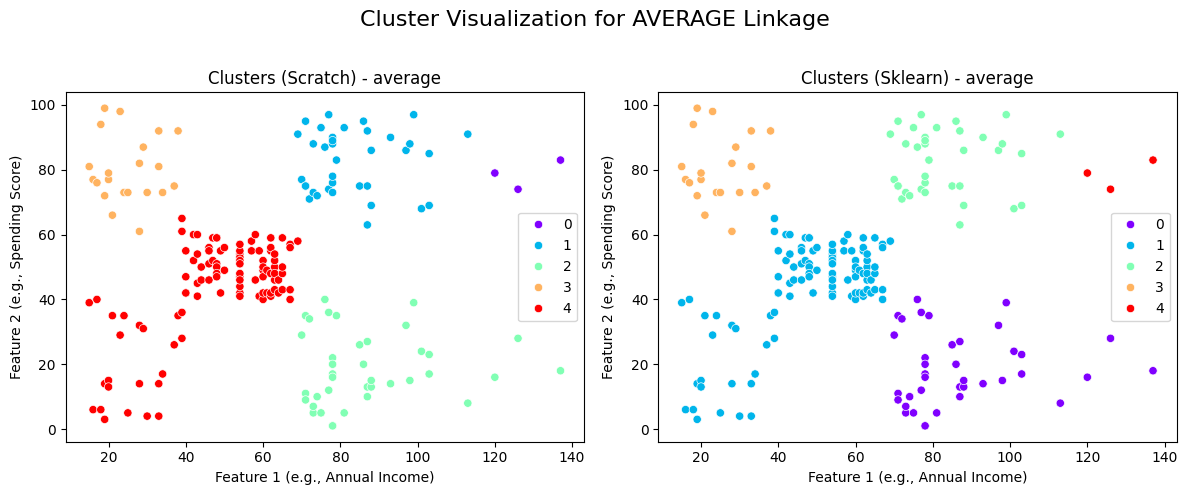

In [22]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering as SklearnAgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

def run_and_compare():
    path_to_file = 'data.csv'
    selected_data = None
    try:
        customer_data_full = pd.read_csv(path_to_file)
        
        income_col_name = 'Annual Income (k$)'
        spending_col_name = 'Spending Score (1-100)'

        if income_col_name in customer_data_full.columns and spending_col_name in customer_data_full.columns:
            selected_data = customer_data_full[[income_col_name, spending_col_name]].values
            print(f"Successfully loaded data from '{path_to_file}'. Using columns: '{income_col_name}' and '{spending_col_name}'.")
            print(f"Data shape: {selected_data.shape}")
        else:
            print(f"Warning: Columns '{income_col_name}' or '{spending_col_name}' not found in '{path_to_file}'.")

    except FileNotFoundError:
        print(f"Warning: '{path_to_file}' not found.")

    N_CLUSTERS = 5  
    if selected_data.shape[0] < N_CLUSTERS:
        N_CLUSTERS = selected_data.shape[0] 
        print(f"Adjusted N_CLUSTERS to {N_CLUSTERS} due to small sample size.")

    linkage_methods_to_test = ['single', 'complete', 'average']

    for linkage_type in linkage_methods_to_test:
        print(f"\n--- Testing Linkage Method: {linkage_type.upper()} ---")

        # 1. From Scratch Implementation
        print("\n1. From Scratch Implementation:")
        scratch_model = AgglomerativeClusteringScratch(n_clusters=N_CLUSTERS, linkage=linkage_type)
        scratch_model.fit(selected_data)
        Z_scratch = scratch_model.linkage_matrix_
        labels_scratch = scratch_model.labels_
        
        print("Linkage Matrix (Scratch) Z_scratch (first 5 rows if large):")
        if Z_scratch is not None and Z_scratch.shape[0] > 0:
            print(pd.DataFrame(Z_scratch, columns=['id1', 'id2', 'distance', 'num_points']).head())
        else:
            print("Z_scratch is empty or None.")
        
        if labels_scratch is not None:
            print(f"Cluster Labels (Scratch) (first 20): {labels_scratch[:20] if labels_scratch.size > 0 else 'Empty'}")
            print(f"Number of unique labels (Scratch): {len(np.unique(labels_scratch)) if labels_scratch.size > 0 else 'N/A'}")


        # 2. Scipy Implementation (for Linkage Matrix)
        print("\n2. Scipy Implementation (for Linkage Matrix):")
        if selected_data.shape[0] > 1 :
            Z_scipy = shc.linkage(selected_data, method=linkage_type, metric='euclidean')
            print("Linkage Matrix (Scipy) Z_scipy (first 5 rows if large):")
            print(pd.DataFrame(Z_scipy, columns=['id1', 'id2', 'distance', 'num_points']).head())

            # Compare Linkage Matrices
            if Z_scratch is not None and Z_scratch.shape[0] > 0 and Z_scipy.shape[0] > 0:
                # Check shape
                if Z_scratch.shape == Z_scipy.shape:
                    # Check distances (column 2) - can have small differences
                    dist_diff = np.abs(Z_scratch[:, 2] - Z_scipy[:, 2])
                    print(f"Max absolute difference in distances between Z_scratch and Z_scipy: {np.max(dist_diff):.4f}")
                    print(f"Mean absolute difference in distances: {np.mean(dist_diff):.4f}")
                    if np.allclose(Z_scratch[:, 2], Z_scipy[:, 2], atol=1e-5): # Relaxed tolerance for distances
                        print("Distances in linkage matrices are very close.")
                    else:
                        print("Distances in linkage matrices have some differences (expected due to precision/tie-breaking).")
                else:
                    print("Linkage matrices Z_scratch and Z_scipy have different shapes.")
            elif Z_scratch is None or Z_scratch.shape[0] == 0:
                 print("Scratch linkage matrix is empty, cannot compare with Scipy's.")

            # Get labels from Scipy's linkage matrix for reference
            if N_CLUSTERS <= selected_data.shape[0] and N_CLUSTERS > 0 :
                labels_scipy_from_Z = shc.fcluster(Z_scipy, t=N_CLUSTERS, criterion='maxclust')
                if labels_scipy_from_Z.min() == 1: labels_scipy_from_Z -=1 # to 0-indexed
                print(f"Cluster Labels (from Z_scipy) (first 20): {labels_scipy_from_Z[:20]}")
        else:
            print("Skipping Scipy linkage matrix generation (requires >1 sample).")


        # 3. Sklearn Implementation (for Labels)
        print("\n3. Sklearn Implementation (for Cluster Labels):")
        if selected_data.shape[0] >= N_CLUSTERS and N_CLUSTERS > 0:
            # sklearn uses 'affinity' for distance metric, 'euclidean' is default if linkage is not 'ward'
            sklearn_model = SklearnAgglomerativeClustering(n_clusters=N_CLUSTERS, linkage=linkage_type, metric='euclidean')
            labels_sklearn = sklearn_model.fit_predict(selected_data)
            print(f"Cluster Labels (Sklearn) (first 20): {labels_sklearn[:20]}")
            print(f"Number of unique labels (Sklearn): {len(np.unique(labels_sklearn))}")

            # Compare Labels (Scratch vs Sklearn)
            if labels_scratch is not None and labels_scratch.size > 0:
                if labels_scratch.shape == labels_sklearn.shape:
                    ari_score = adjusted_rand_score(labels_scratch, labels_sklearn)
                    print(f"Adjusted Rand Index (Scratch vs Sklearn labels): {ari_score:.4f}")
                    if ari_score > 0.95:
                        print("Cluster labels from Scratch and Sklearn are highly similar.")
                    else:
                        print("Cluster labels from Scratch and Sklearn show some differences.")
                else:
                    print("Label arrays from Scratch and Sklearn have different shapes.")
            else:
                print("Scratch labels are not available for comparison with Sklearn.")
        else:
            print(f"Skipping Sklearn clustering (requires n_samples >= n_clusters, and n_clusters > 0). N_samples={selected_data.shape[0]}, N_clusters={N_CLUSTERS}")


        if selected_data.shape[0] <= 50 and selected_data.shape[0] > 1: # Avoid for large datasets
            try:
                plt.figure(figsize=(12, 8))
                
                if Z_scratch is not None and Z_scratch.shape[0] > 0:
                    plt.subplot(1, 2, 1)
                    shc.dendrogram(Z_scratch)
                    plt.title(f'Dendrogram (Scratch) - {linkage_type}')
                
                if 'Z_scipy' in locals() and Z_scipy.shape[0] > 0:
                    plt.subplot(1, 2, 2)
                    shc.dendrogram(Z_scipy)
                    plt.title(f'Dendrogram (Scipy) - {linkage_type}')
                
                plt.suptitle(f"Dendrogram Comparison for {linkage_type.upper()} Linkage", fontsize=16)
                plt.tight_layout(rect=[0, 0, 1, 0.96])
                plt.show()
            except Exception as e:
                print(f"Could not plot dendrograms: {e}")
        elif selected_data.shape[0] > 1:
            print("Skipping dendrogram plotting for larger dataset to maintain clarity.")
            
        # Optional: Plot scatter of clustered data
        if selected_data.shape[1] == 2 and labels_scratch is not None and labels_scratch.size > 0 :
             try:
                plt.figure(figsize=(12, 5))
                plt.subplot(1,2,1)
                sns.scatterplot(x=selected_data[:, 0], y=selected_data[:, 1], hue=labels_scratch, palette='rainbow')
                plt.title(f'Clusters (Scratch) - {linkage_type}')
                plt.xlabel('Feature 1 (e.g., Annual Income)')
                plt.ylabel('Feature 2 (e.g., Spending Score)')

                if 'labels_sklearn' in locals() and labels_sklearn.size > 0:
                    plt.subplot(1,2,2)
                    sns.scatterplot(x=selected_data[:, 0], y=selected_data[:, 1], hue=labels_sklearn, palette='rainbow')
                    plt.title(f'Clusters (Sklearn) - {linkage_type}')
                    plt.xlabel('Feature 1 (e.g., Annual Income)')
                    plt.ylabel('Feature 2 (e.g., Spending Score)')
                
                plt.suptitle(f"Cluster Visualization for {linkage_type.upper()} Linkage", fontsize=16)
                plt.tight_layout(rect=[0, 0, 1, 0.96])
                plt.show()
             except Exception as e:
                print(f"Could not plot scatter plots: {e}")


if __name__ == '__main__':
    run_and_compare()